# SuPreMo-Akita weighted scores

In this walkthrough, we will run get_Akita_scores on CTCF binding site deletions, which we generated in [custom_perturbations.ipynb](https://github.com/ketringjoni/Akita_variant_scoring/blob/main/walkthroughs/custom_perturbations.ipynb) and use genes as weights.

To do so, we've run the following command (the output of the following cell) in the terminal. By changing the variables below, you can get a command that fits your custom set of perturbations. Note: there are more arguments available that are not included here.  

In [1]:
import pandas as pd
import numpy as np
import os
from collections import Counter

In [2]:
# Change the following paths to match your working directory/input file/output files

data_dir = 'test_data/custom_perturbations/'

in_file = f'{data_dir}input/CTCF_del_symb_alleles.txt' # Input directory
directory = f'{data_dir}weighted_output' # Output directory

In [3]:
# Write command

shift_by = '-1 0 1' # Shift sequences by 1 bp left and right
revcomp = 'add_revcomp' # Also score the reverse complement of all sequences
file = 'CTCF_del_weighted' # Output files prefix
roi = 'genes'
roi_scales = 10

out_file = os.path.join(directory, file) # Path to output files

print('Run this command in the main directory:\n')
print('python scripts/SuPreMo.py', in_file,
      '--shift_by', shift_by,
      '--revcomp', revcomp,
      '--file', file,
      '--dir', directory,
      '--get_Akita_scores',
      '--get_maps',
      '--get_tracks',
      '--roi', roi,
      '--roi_scales', roi_scales)


Run this command in the main directory:

python scripts/SuPreMo.py test_data/custom_perturbations/input/CTCF_del_symb_alleles.txt --shift_by -1 0 1 --revcomp add_revcomp --file CTCF_del_weighted --dir test_data/custom_perturbations/weighted_output --get_Akita_scores --get_maps --get_tracks --roi genes --roi_scales 10


In [4]:
# Read input

import sys
sys.path.insert(0, '../scripts')

import reading_utils
reading_utils.var_set_size = 10000000000

variants = reading_utils.read_input(f'../{in_file}', 0)
variants[:10]

,CHROM,POS,REF,ALT,END,SVTYPE,SVLEN
0,chr1,100276250,-,-,100276269,DEL,19
1,chr1,101106697,-,-,101106716,DEL,19
2,chr1,101159421,-,-,101159440,DEL,19
3,chr1,101442377,-,-,101442396,DEL,19
4,chr1,101526743,-,-,101526762,DEL,19
5,chr1,101595702,-,-,101595721,DEL,19
6,chr1,101693506,-,-,101693525,DEL,19
7,chr1,101744879,-,-,101744898,DEL,19
8,chr1,102007853,-,-,102007872,DEL,19
9,chr1,10192988,-,-,10193007,DEL,19


# Get scores

In [5]:
# Read scores file

scores = pd.read_csv(f'../{out_file}_scores', sep = '\t')
scores.iloc[:10,:10]

,var_index,mse_HFF_-1,mse_10-weighted_HFF_-1,corr_HFF_-1,corr_unweighted_HFF_-1,corr_10-weighted_HFF_-1,mse_HFF_0,mse_10-weighted_HFF_0,corr_HFF_0,corr_unweighted_HFF_0
0,0,0.003009,0.003161,0.984663,0.024730,0.025437,0.006867,0.006579,0.960436,0.047487
1,1,0.004472,0.004310,0.992411,0.012973,0.012212,0.004990,0.004897,0.991197,0.014773
2,2,0.006182,0.006243,0.989617,0.020733,0.019786,0.009294,0.008960,0.984339,0.026835
3,3,0.014067,0.013977,0.958524,0.055419,0.054037,0.004430,0.004354,0.984087,0.020359
4,4,0.005012,0.004955,0.973819,0.038931,0.038213,0.004997,0.005108,0.980311,0.029282
5,5,0.003381,0.003416,0.984231,0.030802,0.030249,0.003852,0.003874,0.981589,0.031710
6,6,0.004194,0.004063,0.964545,0.072446,0.069763,0.003161,0.003100,0.979445,0.031958
7,7,0.003248,0.003182,0.968563,0.052541,0.051841,0.005499,0.005442,0.931995,0.116087
8,8,0.002732,0.002738,0.878060,0.127131,0.125717,0.002384,0.002464,0.885885,0.146404
9,9,0.003190,0.003107,0.990839,0.012123,0.012006,0.003946,0.004047,0.990144,0.013410


In [6]:
# These are all the scores that were calculated 
scores.columns[1:]

Index(['mse_HFF_-1', 'mse_10-weighted_HFF_-1', 'corr_HFF_-1',
       'corr_unweighted_HFF_-1', 'corr_10-weighted_HFF_-1', 'mse_HFF_0',
       'mse_10-weighted_HFF_0', 'corr_HFF_0', 'corr_unweighted_HFF_0',
       'corr_10-weighted_HFF_0', 'mse_HFF_0_revcomp',
       'mse_10-weighted_HFF_0_revcomp', 'corr_HFF_0_revcomp',
       'corr_unweighted_HFF_0_revcomp', 'corr_10-weighted_HFF_0_revcomp',
       'mse_HFF_1', 'mse_10-weighted_HFF_1', 'corr_HFF_1',
       'corr_unweighted_HFF_1', 'corr_10-weighted_HFF_1'],
      dtype='object')

In [7]:
# Add scores dataframe to input dataframe to match them with information about the perturbations

scores = pd.concat([variants, scores], axis = 1)
scores.iloc[:10,:10]

,CHROM,POS,REF,ALT,END,SVTYPE,SVLEN,var_index,mse_HFF_-1,mse_10-weighted_HFF_-1
0,chr1,100276250,-,-,100276269,DEL,19,0,0.003009,0.003161
1,chr1,101106697,-,-,101106716,DEL,19,1,0.004472,0.004310
2,chr1,101159421,-,-,101159440,DEL,19,2,0.006182,0.006243
3,chr1,101442377,-,-,101442396,DEL,19,3,0.014067,0.013977
4,chr1,101526743,-,-,101526762,DEL,19,4,0.005012,0.004955
5,chr1,101595702,-,-,101595721,DEL,19,5,0.003381,0.003416
6,chr1,101693506,-,-,101693525,DEL,19,6,0.004194,0.004063
7,chr1,101744879,-,-,101744898,DEL,19,7,0.003248,0.003182
8,chr1,102007853,-,-,102007872,DEL,19,8,0.002732,0.002738
9,chr1,10192988,-,-,10193007,DEL,19,9,0.003190,0.003107


## Get map pairs where weights have strong effect on score

In [9]:
scores['weight_diff'] = [x-y for x,y in zip(scores['mse_10-weighted_HFF_0'], scores['mse_HFF_0'])]

In [10]:
scores.sort_values('weight_diff')

,CHROM,POS,REF,ALT,END,SVTYPE,SVLEN,var_index,mse_HFF_-1,mse_10-weighted_HFF_-1,...,mse_10-weighted_HFF_0_revcomp,corr_HFF_0_revcomp,corr_unweighted_HFF_0_revcomp,corr_10-weighted_HFF_0_revcomp,mse_HFF_1,mse_10-weighted_HFF_1,corr_HFF_1,corr_unweighted_HFF_1,corr_10-weighted_HFF_1,weight_diff
2,chr1,101159421,-,-,101159440,DEL,19,2,0.006182,0.006243,...,0.015315,0.981446,0.021482,0.021050,0.011341,0.011446,0.983993,0.030186,0.028981,-3.331769e-04
0,chr1,100276250,-,-,100276269,DEL,19,0,0.003009,0.003161,...,0.002419,0.986691,0.022643,0.022082,0.007648,0.007588,0.956561,0.057416,0.057705,-2.877179e-04
41,chr1,11139402,-,-,11139421,DEL,19,41,0.013239,0.014437,...,0.006699,0.984732,0.025481,0.027019,0.006609,0.006824,0.984191,0.022150,0.021713,-2.054833e-04
1,chr1,101106697,-,-,101106716,DEL,19,1,0.004472,0.004310,...,0.003033,0.995586,0.007864,0.007542,0.002163,0.002189,0.996655,0.006361,0.006039,-9.226352e-05
3,chr1,101442377,-,-,101442396,DEL,19,3,0.014067,0.013977,...,0.007533,0.967367,0.041829,0.041042,0.009354,0.009300,0.969578,0.042530,0.041781,-7.657801e-05
6,chr1,101693506,-,-,101693525,DEL,19,6,0.004194,0.004063,...,0.008952,0.892433,0.177719,0.172151,0.002438,0.002360,0.976089,0.050149,0.048087,-6.147015e-05
7,chr1,101744879,-,-,101744898,DEL,19,7,0.003248,0.003182,...,0.007058,0.924625,0.152726,0.149832,0.002999,0.002949,0.977769,0.038115,0.037346,-5.698491e-05
49,chr1,114180016,-,-,114180035,DEL,19,49,0.004335,0.004627,...,0.015080,0.949578,0.058097,0.055640,0.013346,0.014156,0.948051,0.055110,0.057049,-4.163998e-05
42,chr1,111744127,-,-,111744146,DEL,19,42,0.008821,0.008976,...,0.012286,0.951511,0.069401,0.068679,0.011034,0.011482,0.974481,0.027525,0.029574,-4.133112e-05
12,chr1,103776583,-,-,103776602,DEL,19,12,0.002222,0.002217,...,0.003914,0.946917,0.066901,0.067568,0.009246,0.009303,0.917088,0.089232,0.084978,-2.075207e-05


In [11]:
example_maps = [2,0,37,45]

# Maps files

In [12]:
import sys
sys.path.insert(0, '../scripts')

import math
import plotting_utils

/pollard/home/ketringjoni/miniconda3/envs/get_Akita_scores_env/lib/python3.10/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/pollard/home/ketringjoni/miniconda3/envs/get_Akita_scores_env/lib/python3.10/site-packages/cooltools/lib/numutils.py:634: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def iterative_correction_symmetric(
/pollard/home/ketringjoni/miniconda3/envs/get_Akita_scores_env/lib/python3.10/site-packages/cooltools/lib/numutils.py:703: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 

In [13]:
# Read in maps
maps = np.load(f'../{out_file}_maps.npy', allow_pickle="TRUE").item()

In [14]:
maps.keys()

dict_keys(['0_maps_HFF_-1', '0_maps_HFF_0', '0_maps_HFF_0_revcomp', '0_maps_HFF_1', '1_maps_HFF_-1', '1_maps_HFF_0', '1_maps_HFF_0_revcomp', '1_maps_HFF_1', '2_maps_HFF_-1', '2_maps_HFF_0', '2_maps_HFF_0_revcomp', '2_maps_HFF_1', '3_maps_HFF_-1', '3_maps_HFF_0', '3_maps_HFF_0_revcomp', '3_maps_HFF_1', '4_maps_HFF_-1', '4_maps_HFF_0', '4_maps_HFF_0_revcomp', '4_maps_HFF_1', '5_maps_HFF_-1', '5_maps_HFF_0', '5_maps_HFF_0_revcomp', '5_maps_HFF_1', '6_maps_HFF_-1', '6_maps_HFF_0', '6_maps_HFF_0_revcomp', '6_maps_HFF_1', '7_maps_HFF_-1', '7_maps_HFF_0', '7_maps_HFF_0_revcomp', '7_maps_HFF_1', '8_maps_HFF_-1', '8_maps_HFF_0', '8_maps_HFF_0_revcomp', '8_maps_HFF_1', '9_maps_HFF_-1', '9_maps_HFF_0', '9_maps_HFF_0_revcomp', '9_maps_HFF_1', '10_maps_HFF_-1', '10_maps_HFF_0', '10_maps_HFF_0_revcomp', '10_maps_HFF_1', '11_maps_HFF_-1', '11_maps_HFF_0', '11_maps_HFF_0_revcomp', '11_maps_HFF_1', '12_maps_HFF_-1', '12_maps_HFF_0', '12_maps_HFF_0_revcomp', '12_maps_HFF_1', '13_maps_HFF_-1', '13_maps_H

In [15]:
# Choose the conditions of the map you would like to extract

var_index = example_maps[0] # Row number from input

# Leave the following as is if not specified in the run
shift = 0 
revcomp = ''


# Tracks files

## Disruption tracks

In [16]:
# Read in tracks

tracks = np.load(f'../{out_file}_tracks.npy', allow_pickle="TRUE").item()

In [17]:
tracks.keys()

dict_keys(['0_mse_track_HFF_-1', '0_corr_track_HFF_-1', '0_mse_track_HFF_0', '0_corr_track_HFF_0', '0_mse_track_HFF_0_revcomp', '0_corr_track_HFF_0_revcomp', '0_mse_track_HFF_1', '0_corr_track_HFF_1', '1_mse_track_HFF_-1', '1_corr_track_HFF_-1', '1_mse_track_HFF_0', '1_corr_track_HFF_0', '1_mse_track_HFF_0_revcomp', '1_corr_track_HFF_0_revcomp', '1_mse_track_HFF_1', '1_corr_track_HFF_1', '2_mse_track_HFF_-1', '2_corr_track_HFF_-1', '2_mse_track_HFF_0', '2_corr_track_HFF_0', '2_mse_track_HFF_0_revcomp', '2_corr_track_HFF_0_revcomp', '2_mse_track_HFF_1', '2_corr_track_HFF_1', '3_mse_track_HFF_-1', '3_corr_track_HFF_-1', '3_mse_track_HFF_0', '3_corr_track_HFF_0', '3_mse_track_HFF_0_revcomp', '3_corr_track_HFF_0_revcomp', '3_mse_track_HFF_1', '3_corr_track_HFF_1', '4_mse_track_HFF_-1', '4_corr_track_HFF_-1', '4_mse_track_HFF_0', '4_corr_track_HFF_0', '4_mse_track_HFF_0_revcomp', '4_corr_track_HFF_0_revcomp', '4_mse_track_HFF_1', '4_corr_track_HFF_1', '5_mse_track_HFF_-1', '5_corr_track_HFF

In [18]:
# Choose the conditions of the map you would like to extract

var_index = example_maps[0] # Row number from input
scoring_method = 'mse' # Scoring method used. Default is mse (mean squared error) and corr (spearman correlation)

# Leave the following as is if not specified in the run
shift = 0 
revcomp = ''


In [19]:
# Get disruption track

variant_id = f'{var_index}_{scoring_method}_track_HFF_{shift}{revcomp}'

disruption_track = tracks[variant_id]


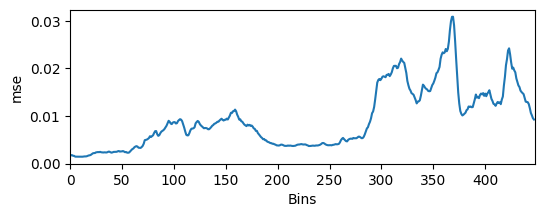

In [20]:
# Plot disruption track

plotting_utils.plot_disruption_tracks(disruption_track, scoring_method)

## Weight track

In [7]:
import get_Akita_scores_utils
import get_roi_utils
from pybedtools import BedTool
genome = 'hg38'

get_Akita_scores_utils.BedTool = BedTool
get_Akita_scores_utils.roi_coords_BED = get_roi_utils.get_roi(roi, genome)



def get_weight_track(disruption_track, roi_in_map, roi_scale):


    # Get the bins that correspond regions of interest (roi)
    
    roi_bins = []
    for i in range(len(roi_in_map)):
        
        bins_i = list(range(roi_in_map.iloc[i].Start, roi_in_map.iloc[i].End + 1))
        roi_bins.append(bins_i)
    
    roi_bins = np.unique([item for group in roi_bins for item in group if item < 448])
    
    background_weight = 1

    # Get weight track
    
    weight_track = np.array([background_weight]*len(disruption_track))

    for i in roi_bins:
        weight_track[i] = roi_scale
    # Add nans to weight track
    weight_track[np.isnan(disruption_track)] = 0

    return weight_track


## Plot

In [6]:
import sys
sys.path.insert(0, '../scripts')
import reading_utils
reading_utils.var_set_size = 10000000000
import math
import plotting_utils
shift = 0
revcomp = ''
scoring_method = 'corr'
roi_scales = 10
roi = 'genes'

out_file = 'SuPreMo_output/SuPreMo'
tracks = np.load(f'../{out_file}_tracks.npy', allow_pickle="TRUE").item()
maps = np.load(f'../{out_file}_maps.npy', allow_pickle="TRUE").item()
variants = reading_utils.read_input(f'../temp.bed', 0)
scores = pd.concat([variants, pd.read_csv(f'../{out_file}_scores', sep = '\t')], axis = 1)

In [4]:
scores

,CHROM,POS,END,REF,ALT,SVTYPE,SVLEN,var_index,mse_HFF_0,mse_10-weighted_HFF_0,corr_HFF_0,corr_unweighted_HFF_0,corr_10-weighted_HFF_0
0,chr1,244397848,244422848.0,A,<DUP:TANDEM>,DUP,25000.0,0,0.009601,0.010070,0.970156,0.042306,0.042452
1,chr2,400000,500500.0,C,<DUP:TANDEM>,DUP,100500.0,1,0.011751,0.011726,0.975185,0.044858,0.045260
2,chr2,400000,455000.0,C,<DUP:TANDEM>,DUP,55000.0,2,0.021425,0.021371,0.959863,0.049454,0.053273
3,chr10,37600000,37700500.0,G,<DUP:TANDEM>,DUP,100500.0,3,0.009234,0.009202,0.827364,0.173558,0.184923
4,chr10,37600000,37655000.0,G,<DUP:TANDEM>,DUP,55000.0,4,0.011443,0.011584,0.750028,0.244326,0.251773


posx and posy should be finite values
posx and posy should be finite values


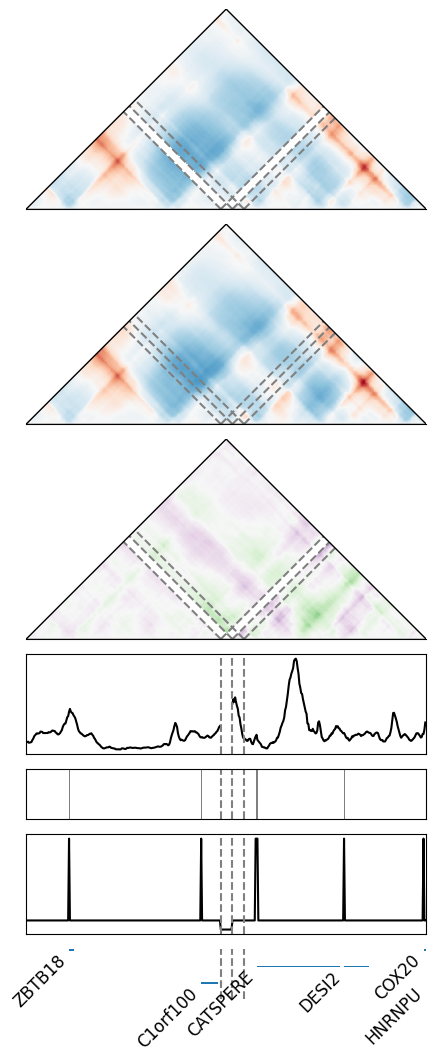

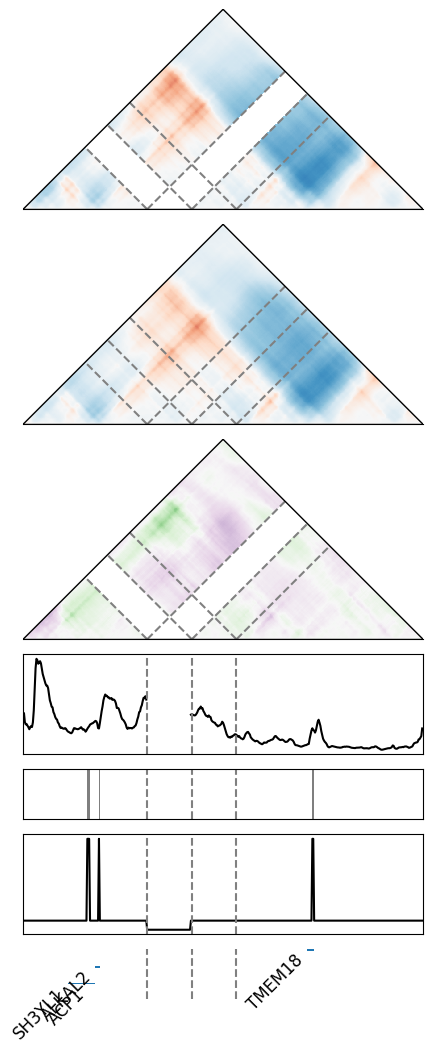

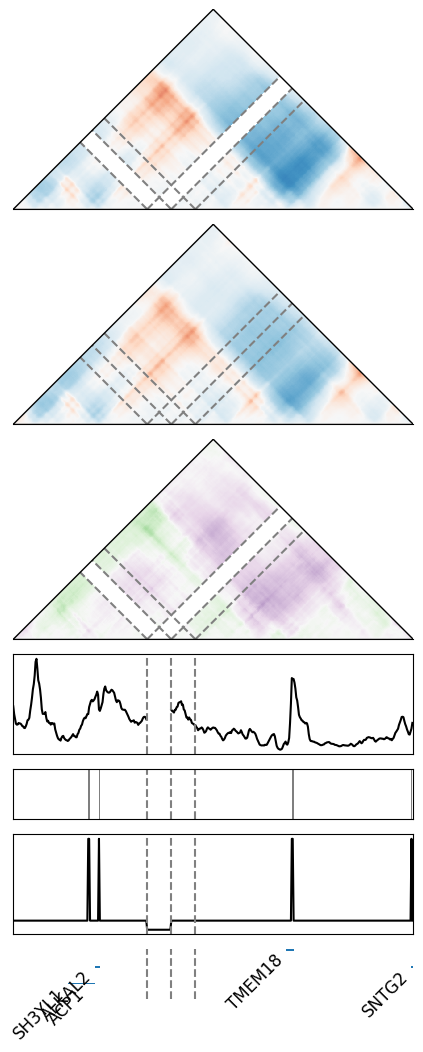

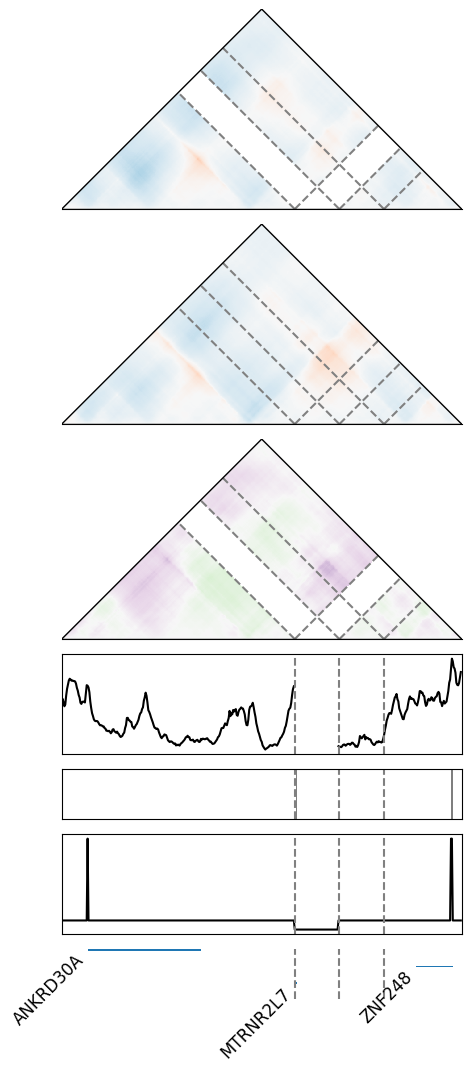

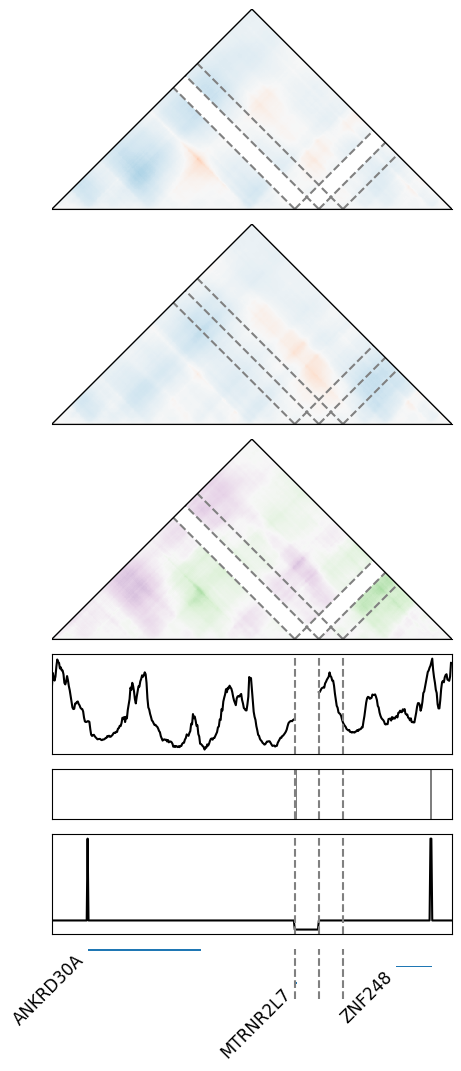

In [8]:
# Plot maps for the chosen variant
for var_index in range(5):

    variant_id = f'{var_index}_maps_HFF_{shift}{revcomp}'
    
    REF_pred, ALT_pred = maps[variant_id][:2]
    REF_pred, ALT_pred = [get_Akita_scores_utils.map_from_vector(x) for x in [REF_pred, ALT_pred]]
    
    rel_pos_map = maps[variant_id][2]
    map_start_coord = maps[variant_id][3]
    
    CHR = scores[scores.var_index == var_index].CHROM.values[0]
    
    if 'SVLEN' in variants.columns:
        SVLEN = variants.iloc[var_index].SVLEN
        SVTYPE = variants.iloc[var_index].SVTYPE
    else:
        SVTYPE, SVLEN = '-', '-'
    
    variant_id = f'{var_index}_{scoring_method}_track_HFF_{shift}{revcomp}'
    disruption_track = tracks[variant_id]
    
    genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
    
    # Get roi in map and weight track 
    roi_in_map = get_Akita_scores_utils.get_roi_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
    weight_track = get_weight_track(disruption_track, roi_in_map, roi_scales)
    
    lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)
    
    plotting_utils.plot_maps_roi([REF_pred, ALT_pred], genes_in_map, lines, roi_in_map, disruption_track, weight_track, scale = 1)

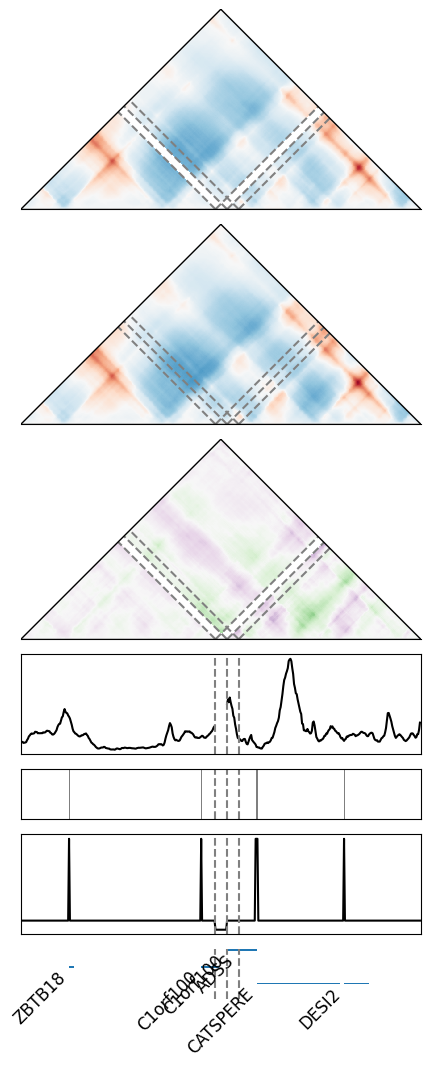

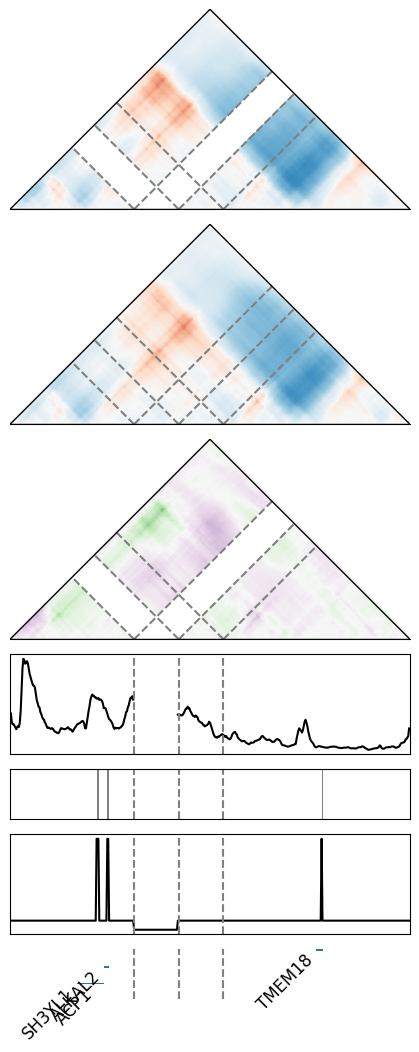

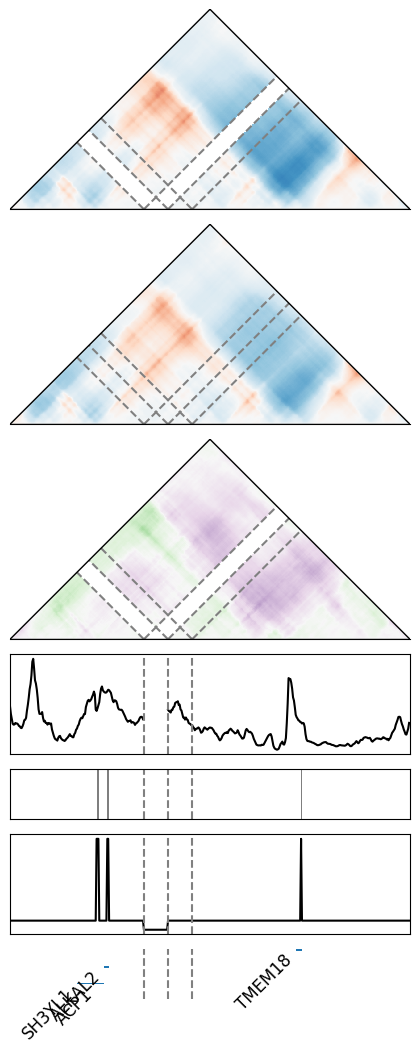

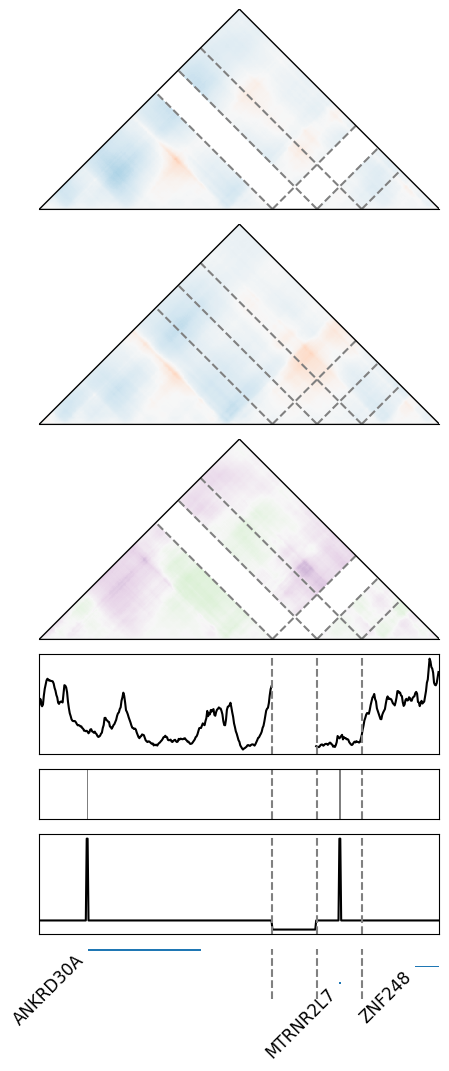

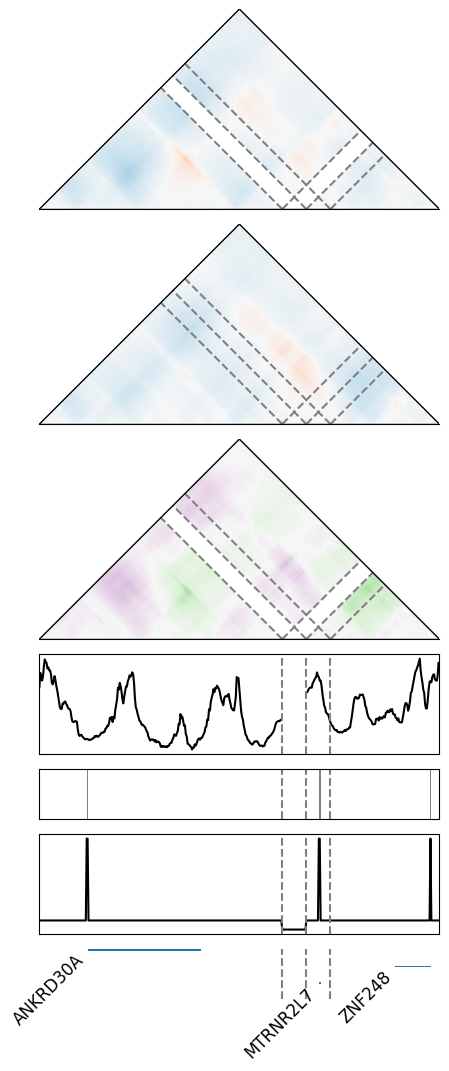

In [80]:
# Plot maps for the chosen variant
for var_index in range(5):

    variant_id = f'{var_index}_maps_HFF_{shift}{revcomp}'
    
    REF_pred, ALT_pred = maps[variant_id][:2]
    REF_pred, ALT_pred = [get_Akita_scores_utils.map_from_vector(x) for x in [REF_pred, ALT_pred]]

    # this uses REF values for both of the following (should use ALT values for duplications instead)
    rel_pos_map = maps[variant_id][2][0]
    map_start_coord = maps[variant_id][3][0]
    
    CHR = scores[scores.var_index == var_index].CHROM.values[0]
    
    if 'SVLEN' in variants.columns:
        SVLEN = variants.iloc[var_index].SVLEN
        SVTYPE = variants.iloc[var_index].SVTYPE
    else:
        SVTYPE, SVLEN = '-', '-'
    
    variant_id = f'{var_index}_{scoring_method}_track_HFF_{shift}{revcomp}'
    disruption_track = tracks[variant_id]
    
    genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
    
    # Get roi in map and weight track 
    roi_in_map = get_Akita_scores_utils.get_roi_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
    weight_track = get_weight_track(disruption_track, roi_in_map, roi_scales)
    
    lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)
    
    plotting_utils.plot_maps_roi([REF_pred, ALT_pred], genes_in_map, lines, roi_in_map, disruption_track, weight_track, scale = 1)

In [40]:
maps[variant_id][2]

[224, 224]

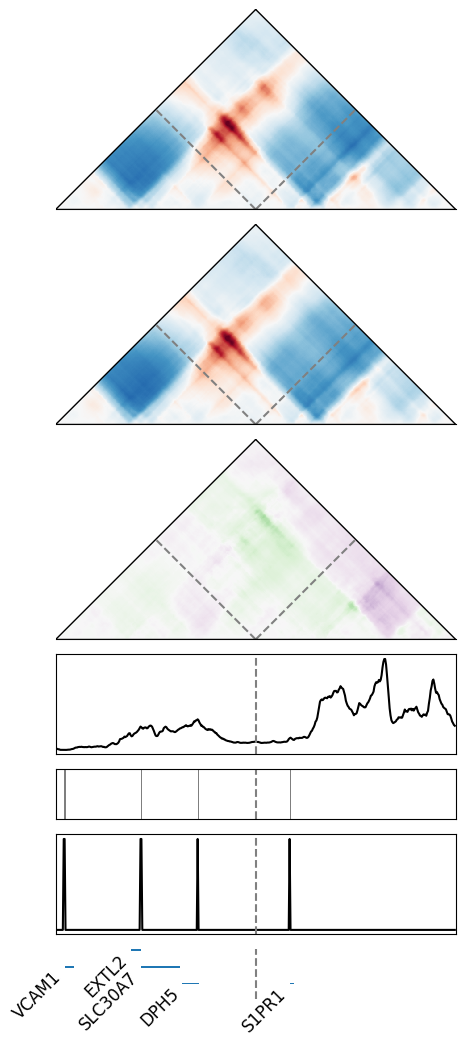

In [41]:
# Plot maps for the chosen variant
var_index = example_maps[0]
variant_id = f'{var_index}_maps_HFF_{shift}{revcomp}'

REF_pred, ALT_pred = maps[variant_id][:2]
REF_pred, ALT_pred = [get_Akita_scores_utils.map_from_vector(x) for x in [REF_pred, ALT_pred]]

rel_pos_map = maps[variant_id][2][0]
map_start_coord = maps[variant_id][3][0]

CHR = scores[scores.var_index == var_index].CHROM.values[0]

if 'SVLEN' in variants.columns:
    SVLEN = variants.iloc[var_index].SVLEN
    SVTYPE = variants.iloc[var_index].SVTYPE
else:
    SVTYPE, SVLEN = '-', '-'

genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)

# Get roi in map and weight track 
roi_in_map = get_Akita_scores_utils.get_roi_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
weight_track = get_weight_track(disruption_track, roi_in_map, roi_scales)

lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)

plotting_utils.plot_maps_roi([REF_pred, ALT_pred], genes_in_map, lines, roi_in_map, disruption_track, weight_track, scale = 1)

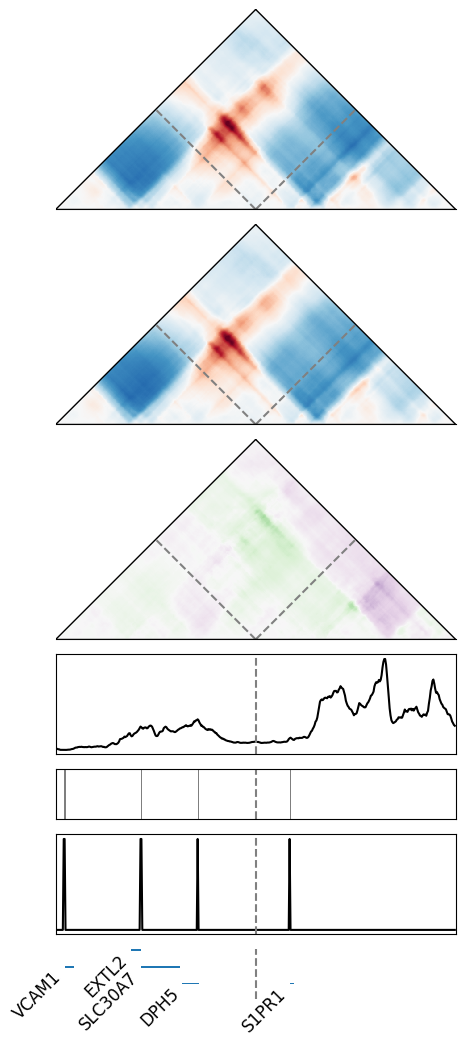

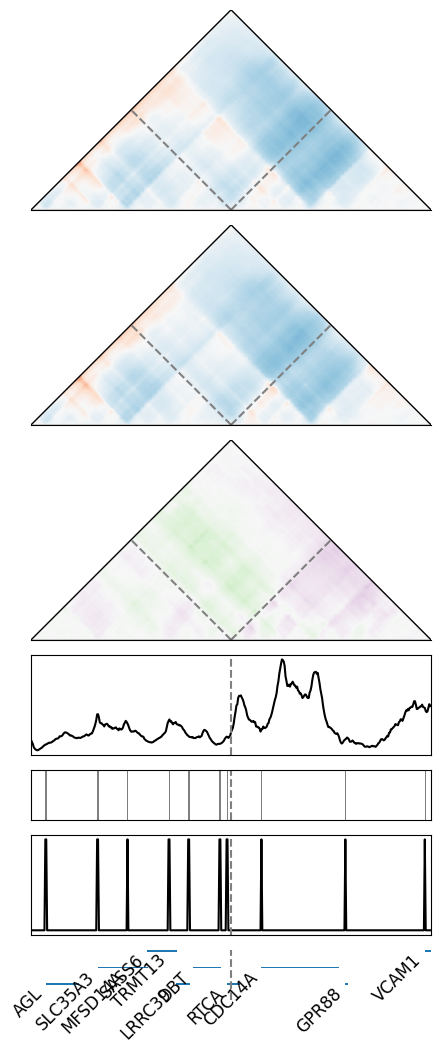

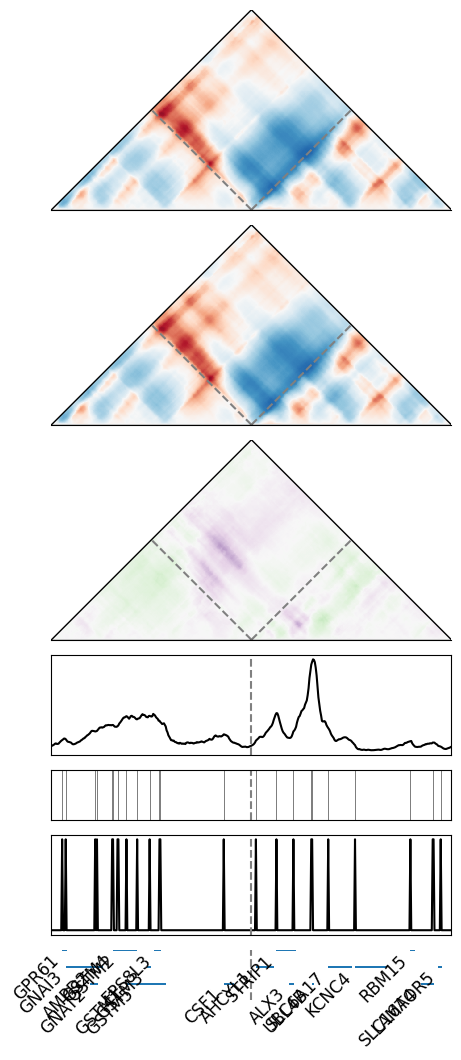

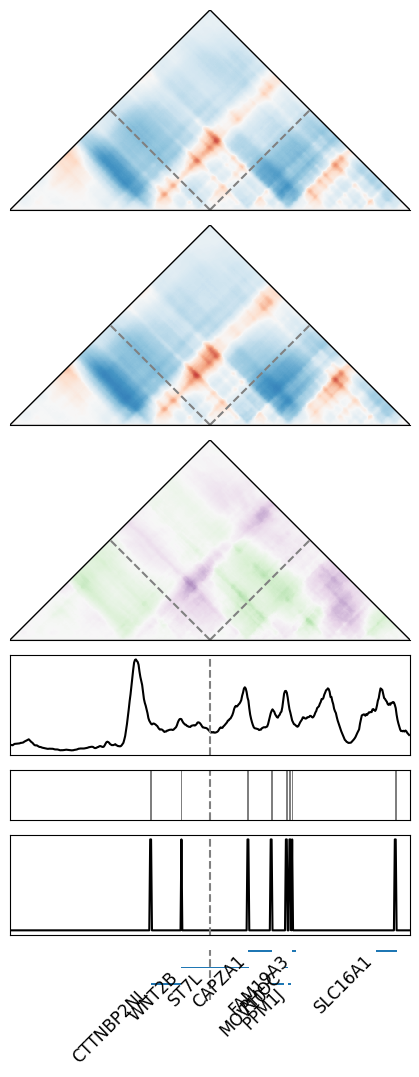

In [42]:
# Plot map pairs where the weights changed the score the most

for var_index in example_maps:
    
    variant_id = f'{var_index}_{scoring_method}_track_HFF_{shift}{revcomp}'
    disruption_track = tracks[variant_id]
    
    variant_id = f'{var_index}_maps_HFF_{shift}{revcomp}'
    REF_pred, ALT_pred = maps[variant_id][:2]
    REF_pred, ALT_pred = [get_Akita_scores_utils.map_from_vector(x) for x in [REF_pred, ALT_pred]]
    
    rel_pos_map = maps[variant_id][2][0]
    map_start_coord = maps[variant_id][3][0]
    
    CHR = scores[scores.var_index == var_index].CHROM.values[0]
    
    if 'SVLEN' in variants.columns:
        SVLEN = variants.iloc[var_index].SVLEN
        SVTYPE = variants.iloc[var_index].SVTYPE
    else:
        SVTYPE, SVLEN = '-', '-'
    
    genes_in_map = plotting_utils.get_genes_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
    
    # Get roi in map and weight track 
    roi_in_map = get_Akita_scores_utils.get_roi_in_map(CHR, map_start_coord, rel_pos_map, SVTYPE, SVLEN)
    weight_track = get_weight_track(disruption_track, roi_in_map, roi_scales)
    
    lines = plotting_utils.get_var_bins(rel_pos_map, SVTYPE, SVLEN)
    
    plotting_utils.plot_maps_roi([REF_pred, ALT_pred], genes_in_map, lines, roi_in_map, disruption_track, weight_track, scale = 1)